# Data Loading

In [31]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib notebook
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
import missingno as msno
from datetime import datetime as dt


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('../data_local'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

../data_local\items.csv
../data_local\item_categories.csv
../data_local\sales_train.csv
../data_local\sample_submission.csv
../data_local\shops.csv
../data_local\test.csv


In [32]:
train2 = pd.read_csv('../data_local/sales_train.csv', index_col='date', parse_dates= True)
train = pd.read_csv('../data_local/sales_train.csv')
sample_submission = pd.read_csv('../data_local/sample_submission.csv')
test = pd.read_csv('../data_local/test.csv')
items = pd.read_csv('../data_local/items.csv')
item_categories = pd.read_csv('../data_local/item_categories.csv')
shops = pd.read_csv('../data_local/shops.csv')

# Data Cleaning & Data Visualization

In [25]:
item_categories

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
...,...,...
79,Служебные,79
80,Служебные - Билеты,80
81,Чистые носители (шпиль),81
82,Чистые носители (штучные),82


In [27]:
items

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
...,...,...,...
22165,"Ядерный титбит 2 [PC, Цифровая версия]",22165,31
22166,Язык запросов 1С:Предприятия [Цифровая версия],22166,54
22167,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...,22167,49
22168,Яйцо для Little Inu,22168,62


In [28]:
df_merge= pd.merge(AD_df, Project_df, how='left', left_on='SURVEY', right_on='SURVEY')

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4
5,"Вологда ТРЦ ""Мармелад""",5
6,"Воронеж (Плехановская, 13)",6
7,"Воронеж ТРЦ ""Максимир""",7
8,"Воронеж ТРЦ Сити-Парк ""Град""",8
9,Выездная Торговля,9


In [60]:
def eda(data):
    print("----------Top-5- Record----------")
    print(data.head(5))
    print("-----------Information-----------")
    print(data.info())
    print("-----------Data Types-----------")
    print(data.dtypes)
    print("----------Missing value-----------")
    print(data.isnull().sum())
    print("----------Null value-----------")
    print(data.isna().sum())
    print("----------Shape of Data----------")
    print(data.shape)

def graph_insight(data):
    print(set(data.dtypes.tolist()))
    df_num = data.select_dtypes(include = ['float64', 'int64'])
    df_num.hist(figsize=(16, 16), bins=50, xlabelsize=8, ylabelsize=8);
    
def drop_duplicate(data, subset):
    print('Before drop shape:', data.shape)
    before = data.shape[0]
    data.drop_duplicates(subset,keep='first', inplace=True) #subset is list where you have to put all column for duplicate check
    data.reset_index(drop=True, inplace=True)
    print('After drop shape:', data.shape)
    after = data.shape[0]
    print('Total Duplicate:', before-after)

----------Top-5- Record----------
            date_block_num  shop_id  item_id  item_price  item_cnt_day
date                                                                  
2013-02-01               0       59    22154      999.00           1.0
2013-03-01               0       25     2552      899.00           1.0
2013-05-01               0       25     2552      899.00          -1.0
2013-06-01               0       25     2554     1709.05           1.0
2013-01-15               0       25     2555     1099.00           1.0
-----------Information-----------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2935849 entries, 2013-02-01 to 2015-03-10
Data columns (total 5 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date_block_num  int64  
 1   shop_id         int64  
 2   item_id         int64  
 3   item_price      float64
 4   item_cnt_day    float64
dtypes: float64(2), int64(3)
memory usage: 134.4 MB
None
-----------Data Types-----------
date_block_num 

<IPython.core.display.Javascript object>


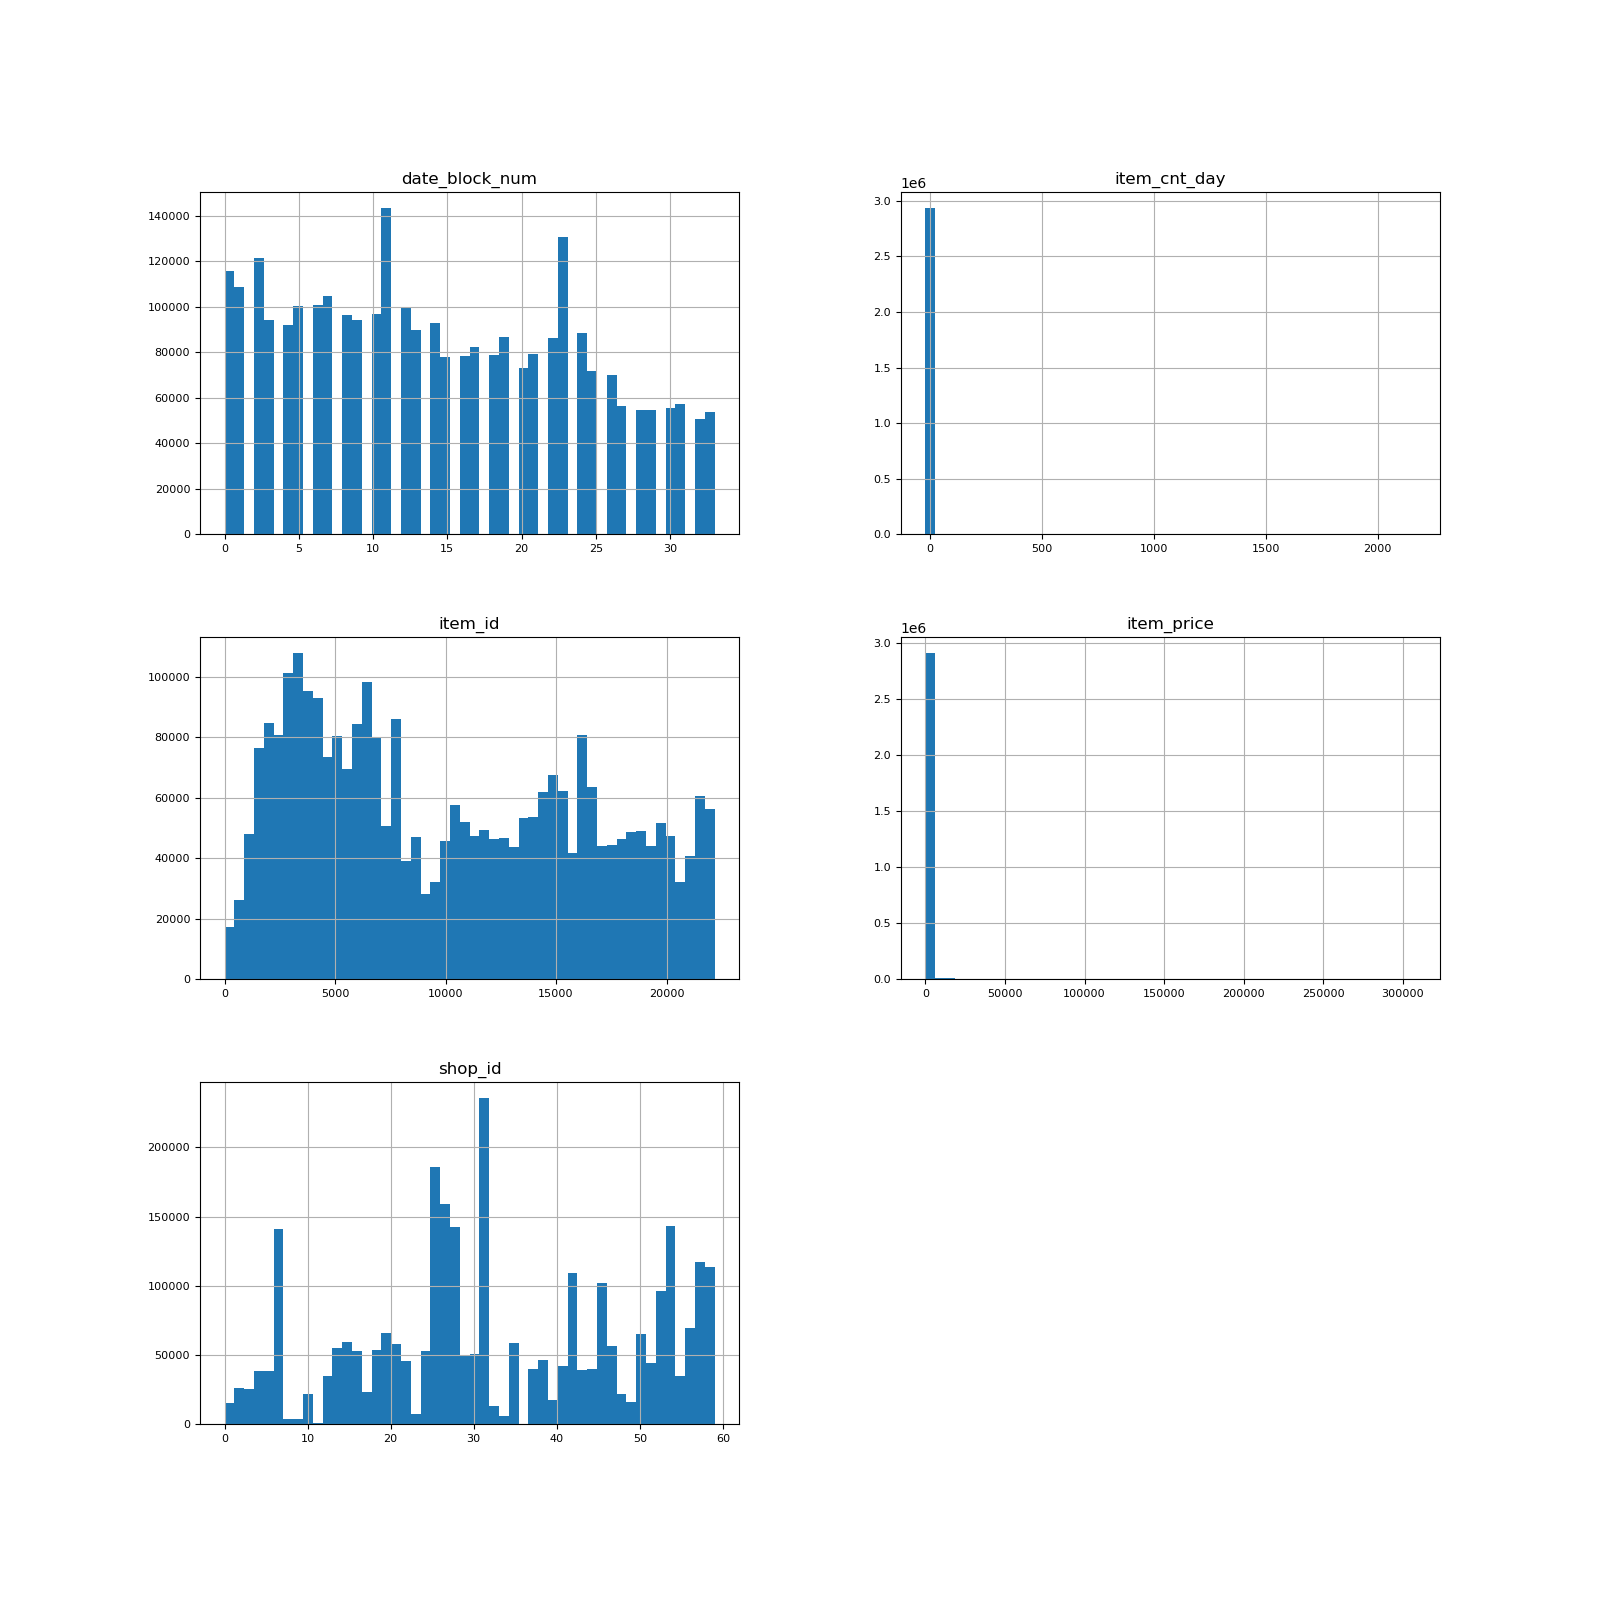

In [61]:
#sales_train insight
eda(train)
graph_insight(train)

In [118]:
train.tail()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2935844,10.10.2015,33,25,7409,299.0,1.0
2935845,09.10.2015,33,25,7460,299.0,1.0
2935846,14.10.2015,33,25,7459,349.0,1.0
2935847,22.10.2015,33,25,7440,299.0,1.0
2935848,03.10.2015,33,25,7460,299.0,1.0


In [119]:
test.head(5)

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [15]:
sample_submission.head()

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [16]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [17]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


<IPython.core.display.Javascript object>


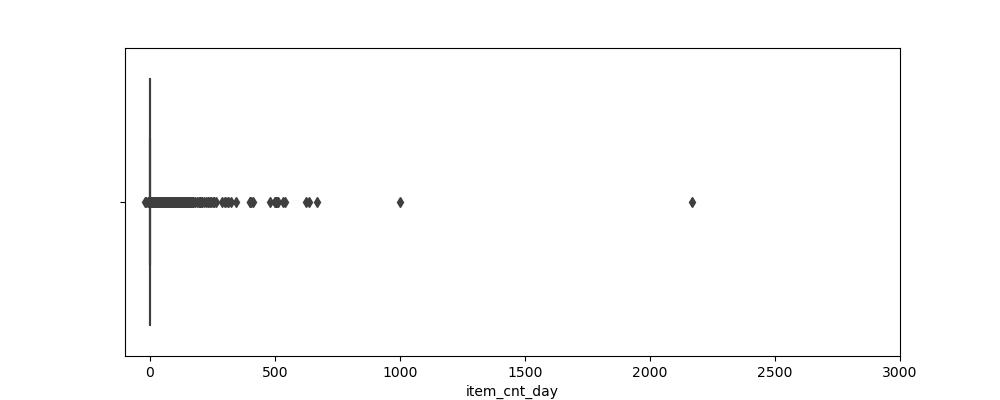

<IPython.core.display.Javascript object>


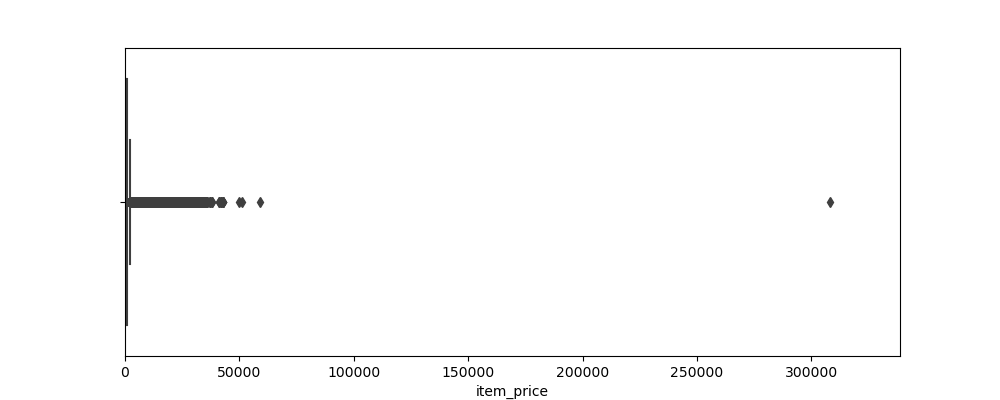

<IPython.core.display.Javascript object>


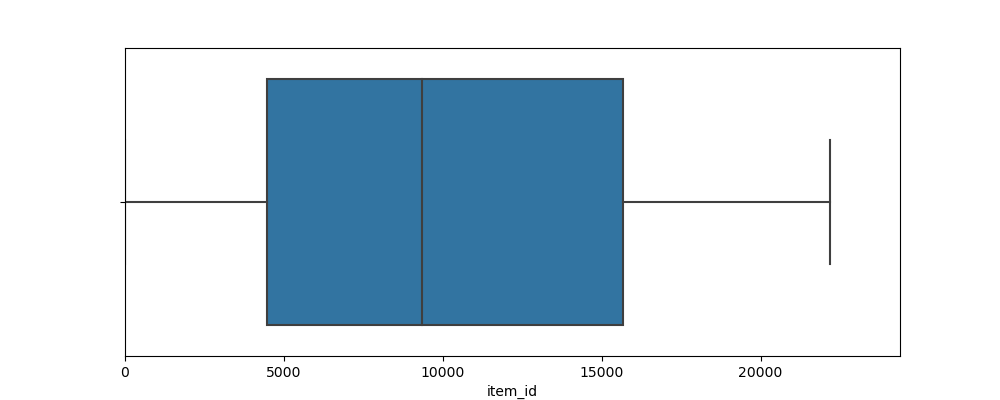

In [87]:
plt.figure(figsize=(10,4))
plt.xlim(-100, 3000)
sns.boxplot(x=train.item_cnt_day)

plt.figure(figsize=(10,4))
plt.xlim(train.item_price.min(), train.item_price.max()*1.1)
sns.boxplot(x=train.item_price)

plt.figure(figsize=(10,4))
plt.xlim(train.item_id.min(), train.item_id.max()*1.1)
sns.boxplot(x=train.item_id)

In [64]:
print(sorted(train['item_cnt_day'].unique()))

[-22.0, -16.0, -9.0, -6.0, -5.0, -4.0, -3.0, -2.0, -1.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 121.0, 124.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 138.0, 139.0, 140.0, 142.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 153.0, 154.0, 156.0, 157.0, 161.0, 163.0, 164.0, 167.0, 168.0, 171.0, 

In [68]:
print(sorted(train['item_price'].unique()))

[-1.0, 0.07, 0.0875, 0.09, 0.1, 0.2, 0.5, 0.9087136929459999, 0.99, 1.0, 1.83, 2.0, 2.99, 3.0, 3.57, 3.59, 3.64, 3.67, 3.69, 3.71, 3.72, 3.8, 4.0, 4.029126213590001, 4.05555555556, 4.1428571428600005, 4.23529411765, 4.3, 4.33333333333, 4.4, 4.46666666667, 4.5, 4.527777777780001, 4.5625, 4.57142857143, 4.66666666667, 4.69375, 4.71, 4.71428571429, 4.75, 4.760383386580001, 4.777777777780001, 4.79, 4.795, 4.8, 4.8125, 4.81818181818, 4.825, 4.83333333333, 4.85, 4.8571428571399995, 4.86363636364, 4.86666666667, 4.875, 4.8825, 4.88888888889, 4.8928571428600005, 4.9, 4.909090909090001, 4.91666666667, 4.92307692308, 4.9275, 4.92857142857, 4.93333333333, 4.93518518519, 4.9375, 4.93833333333, 4.94117647059, 4.94230769231, 4.94444444444, 4.94594594595, 4.94642857143, 4.94736842105, 4.94888888889, 4.95, 4.95238095238, 4.95384615385, 4.95454545455, 4.95833333333, 4.96, 4.96153846154, 4.96428571429, 4.967, 4.96774193548, 4.96875, 4.9696969697, 4.972222222219999, 4.97435897436, 4.975, 4.97727272727, 4

In [33]:
train_clean = train.drop(train[train['item_cnt_day'] < 0].index)
train_clean2 = train_clean.drop(train_clean[train_clean['item_price'] < 0].index)
train_clean2

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
5,10.01.2013,0,25,2564,349.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


In [14]:
ts = train_clean2[['date_block_num','item_cnt_day']]
ts.set_index('date_block_num', inplace=True)
ts

,item_cnt_day
date_block_num,
0,1.0
0,1.0
0,1.0
0,1.0
0,1.0
...,...
33,1.0
33,1.0
33,1.0


In [44]:
train_clean2['date'] = pd.to_datetime(train_clean2['date'])

In [48]:
train_clean2.groupby('date_block_num').count()[['item_cnt_day']]

,item_cnt_day
date_block_num,
0,115338
1,108326
2,121053
3,93865
4,91581
5,100202
6,100350
7,104495
8,95918


In [65]:
gp_train = train_clean2.groupby([ 'item_id','date']).agg({'item_cnt_day': ['sum']}).reset_index()
gp_train


# # HW: plot multidimensional bar chart grouped by shop_id,item_id, x =date_block_num; y= item_cnt_day

,item_id,date,item_cnt_day
,,,sum
0,0,2014-01-09,1.0
1,1,2014-02-04,1.0
2,1,2014-04-04,1.0
3,1,2014-04-08,1.0
4,1,2014-06-07,1.0
...,...,...,...
1538485,22168,2013-02-02,1.0
1538486,22168,2013-02-17,1.0
1538487,22168,2013-08-03,1.0


In [68]:
gp_train.loc[gp_train['item_id']==22168]

,item_id,date,item_cnt_day
,,,sum
1538483,22168,2013-01-15,1.0
1538484,22168,2013-01-20,1.0
1538485,22168,2013-02-02,1.0
1538486,22168,2013-02-17,1.0
1538487,22168,2013-08-03,1.0
1538488,22168,2013-09-13,1.0


In [74]:
shops

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4
5,"Вологда ТРЦ ""Мармелад""",5
6,"Воронеж (Плехановская, 13)",6
7,"Воронеж ТРЦ ""Максимир""",7
8,"Воронеж ТРЦ Сити-Парк ""Град""",8
9,Выездная Торговля,9


In [73]:
items

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
...,...,...,...
22165,"Ядерный титбит 2 [PC, Цифровая версия]",22165,31
22166,Язык запросов 1С:Предприятия [Цифровая версия],22166,54
22167,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...,22167,49
22168,Яйцо для Little Inu,22168,62


In [72]:
item_categories

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
...,...,...
79,Служебные,79
80,Служебные - Билеты,80
81,Чистые носители (шпиль),81
82,Чистые носители (штучные),82


In [76]:
sample_submission

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5
...,...,...
214195,214195,0.5
214196,214196,0.5
214197,214197,0.5
214198,214198,0.5


<IPython.core.display.Javascript object>


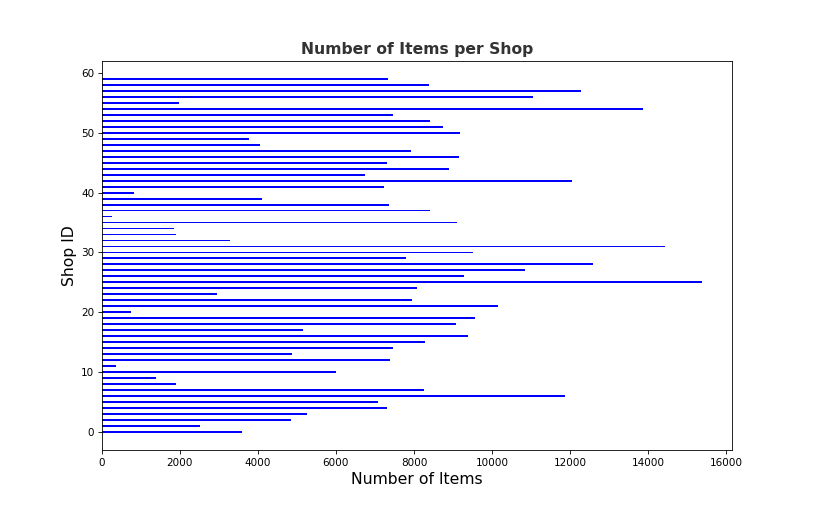

Text(0.5, 1.0, 'Number of Items per Shop')

In [20]:
item_count_per_shop = train_clean2.groupby(['shop_id']).item_id.agg('nunique').reset_index(name='counts')
# item_count_per_shop


fig, ax = plt.subplots(figsize=(10,6))
x =item_count_per_shop['shop_id']
y =item_count_per_shop['counts']

ax1= plt.subplot(1,1,1)
plt.barh(x,y, height = 0.3,color='b')
plt.ylabel('Shop ID', fontsize=15)
plt.xlabel('Number of Items', fontsize=15)
plt.title('Number of Items per Shop', fontsize='15', weight='bold', alpha=0.8)

In [23]:
item_count_per_shop_item = train_clean2.groupby(['shop_id','item_id']).item_cnt_day.agg('count').reset_index(name='counts')
item_count_per_shop_item

,shop_id,item_id,counts
0,0,30,9
1,0,31,7
2,0,32,11
3,0,33,6
4,0,35,12
...,...,...,...
424093,59,22154,1
424094,59,22155,1
424095,59,22162,16
424096,59,22164,6


In [49]:
item_count_per_shop = train_clean2.groupby(['shop_id']).item_cnt_day.agg('count').reset_index(name='counts')
item_count_per_shop

,shop_id,counts
0,0,9857
1,1,5678
2,2,25911
3,3,25413
4,4,38118
5,5,38094
6,6,82402
7,7,57977
8,8,3406
9,9,3743


<IPython.core.display.Javascript object>


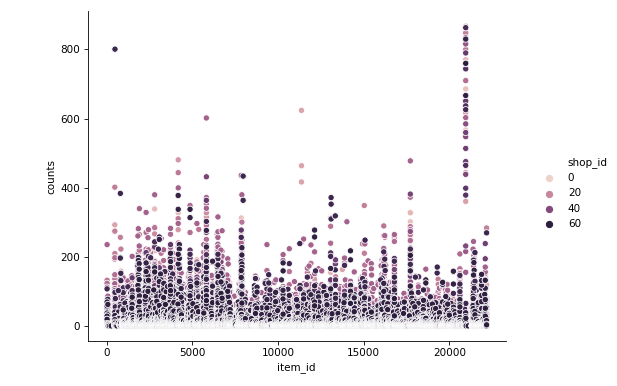

In [24]:
sns.relplot(x="item_id", y="counts", hue="shop_id", data=item_count_per_shop_item)

In [41]:
print(sorted(train_clean2['item_price']a.unique()))

[0.07, 0.0875, 0.09, 0.1, 0.2, 0.5, 0.9087136929459999, 0.99, 1.0, 1.83, 2.0, 2.99, 3.0, 3.57, 3.59, 3.64, 3.67, 3.69, 3.71, 3.72, 3.8, 4.0, 4.029126213590001, 4.05555555556, 4.1428571428600005, 4.23529411765, 4.3, 4.33333333333, 4.4, 4.46666666667, 4.5, 4.527777777780001, 4.5625, 4.57142857143, 4.66666666667, 4.69375, 4.71, 4.71428571429, 4.75, 4.760383386580001, 4.777777777780001, 4.79, 4.795, 4.8, 4.8125, 4.81818181818, 4.825, 4.83333333333, 4.85, 4.8571428571399995, 4.86363636364, 4.86666666667, 4.875, 4.8825, 4.88888888889, 4.8928571428600005, 4.9, 4.909090909090001, 4.91666666667, 4.92307692308, 4.9275, 4.92857142857, 4.93333333333, 4.93518518519, 4.9375, 4.93833333333, 4.94117647059, 4.94230769231, 4.94444444444, 4.94594594595, 4.94642857143, 4.94736842105, 4.94888888889, 4.95, 4.95238095238, 4.95384615385, 4.95454545455, 4.95833333333, 4.96, 4.96153846154, 4.96428571429, 4.967, 4.96774193548, 4.96875, 4.9696969697, 4.972222222219999, 4.97435897436, 4.975, 4.97727272727, 4.97916

In [43]:
print(sorted(train_clean2['item_cnt_day'].unique()))

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 121.0, 124.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 138.0, 139.0, 140.0, 142.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 153.0, 154.0, 156.0, 157.0, 161.0, 163.0, 164.0, 167.0, 168.0, 171.0, 179.0, 187.0, 194.0, 195.0, 200.0, 205.0, 207.0, 217.0, 

<IPython.core.display.Javascript object>


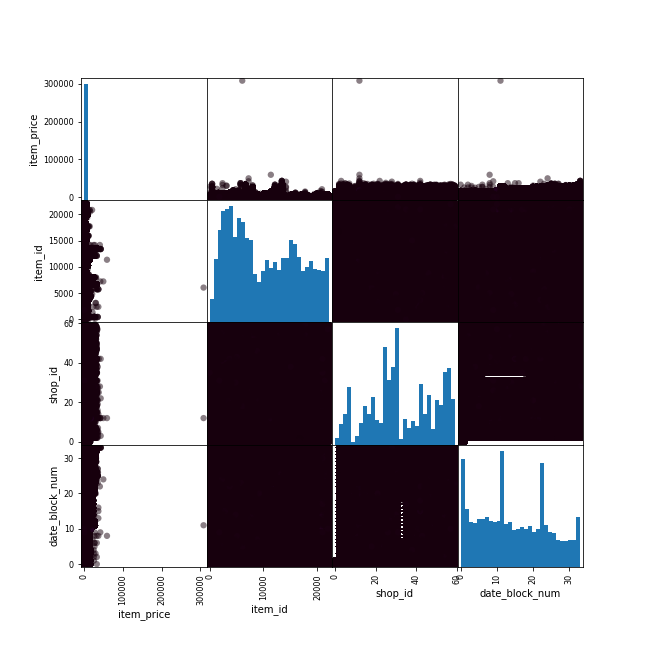

In [13]:
# plotting a scatter matrix
from matplotlib import cm
from pandas.plotting import scatter_matrix

# pd.plotting.scatter_matrix(sale_train, alpha=0.2, figsize=(10, 10))

X = sale_train[['item_price','item_id','shop_id','date_block_num']]
y = sale_train['item_cnt_day']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

seed=1234
cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_train, c= y_train, marker = 'o', s=40, hist_kwds={'bins':30}, figsize=(9,9), cmap=cmap)

<IPython.core.display.Javascript object>


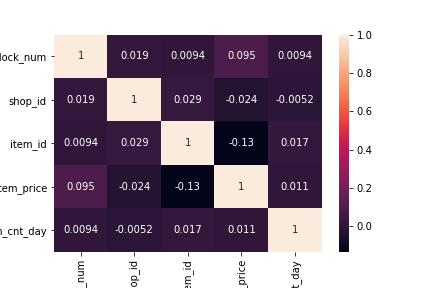

In [4]:
corrMatrix = sale_train.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

# Data Decomposition

In [34]:
train_clean2
train_clean2['Date'] = pd.to_datetime(train_clean2['date'])
train_clean2 = train_clean2.set_index('Date')
train_clean2

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
Date,,,,,,
2013-02-01,02.01.2013,0,59,22154,999.00,1.0
2013-03-01,03.01.2013,0,25,2552,899.00,1.0
2013-06-01,06.01.2013,0,25,2554,1709.05,1.0
2013-01-15,15.01.2013,0,25,2555,1099.00,1.0
2013-10-01,10.01.2013,0,25,2564,349.00,1.0
...,...,...,...,...,...,...
2015-10-10,10.10.2015,33,25,7409,299.00,1.0
2015-09-10,09.10.2015,33,25,7460,299.00,1.0
2015-10-14,14.10.2015,33,25,7459,349.00,1.0


In [158]:
print(sorted(train_clean2['date'].unique()))

['01.01.2013', '01.01.2014', '01.01.2015', '01.02.2013', '01.02.2014', '01.02.2015', '01.03.2013', '01.03.2014', '01.03.2015', '01.04.2013', '01.04.2014', '01.04.2015', '01.05.2013', '01.05.2014', '01.05.2015', '01.06.2013', '01.06.2014', '01.06.2015', '01.07.2013', '01.07.2014', '01.07.2015', '01.08.2013', '01.08.2014', '01.08.2015', '01.09.2013', '01.09.2014', '01.09.2015', '01.10.2013', '01.10.2014', '01.10.2015', '01.11.2013', '01.11.2014', '01.12.2013', '01.12.2014', '02.01.2013', '02.01.2014', '02.01.2015', '02.02.2013', '02.02.2014', '02.02.2015', '02.03.2013', '02.03.2014', '02.03.2015', '02.04.2013', '02.04.2014', '02.04.2015', '02.05.2013', '02.05.2014', '02.05.2015', '02.06.2013', '02.06.2014', '02.06.2015', '02.07.2013', '02.07.2014', '02.07.2015', '02.08.2013', '02.08.2014', '02.08.2015', '02.09.2013', '02.09.2014', '02.09.2015', '02.10.2013', '02.10.2014', '02.10.2015', '02.11.2013', '02.11.2014', '02.12.2013', '02.12.2014', '03.01.2013', '03.01.2014', '03.01.2015', '03.0

In [35]:
train_sorted = train_clean2.drop(['date','shop_id','item_id','item_price','date_block_num'],axis=1)
train_sorted
# Select the proper time period for weekly aggreagation
df = train_sorted['2013-01-01':'2015-12-31'].resample('W').sum()

In [38]:
df

,item_cnt_day
Date,
2013-01-06,22834.0
2013-01-13,28958.0
2013-01-20,26767.0
2013-01-27,27002.0
2013-02-03,32555.0
...,...
2015-11-15,5160.0
2015-11-22,0.0
2015-11-29,0.0


In [37]:
df2 = train_sorted['2013-01-01':'2015-12-31'].resample('W').count()
df2

,item_cnt_day
Date,
2013-01-06,19641
2013-01-13,23492
2013-01-20,23840
2013-01-27,23442
2013-02-03,27954
...,...
2015-11-15,4253
2015-11-22,0
2015-11-29,0


In [172]:
df

,item_cnt_day
Date,
2013-01-06,22834.00000000
2013-01-13,28958.00000000
2013-01-20,26767.00000000
2013-01-27,27002.00000000
2013-02-03,32555.00000000
...,...
2015-11-15,5160.00000000
2015-11-22,0.00000000
2015-11-29,0.00000000


<IPython.core.display.Javascript object>


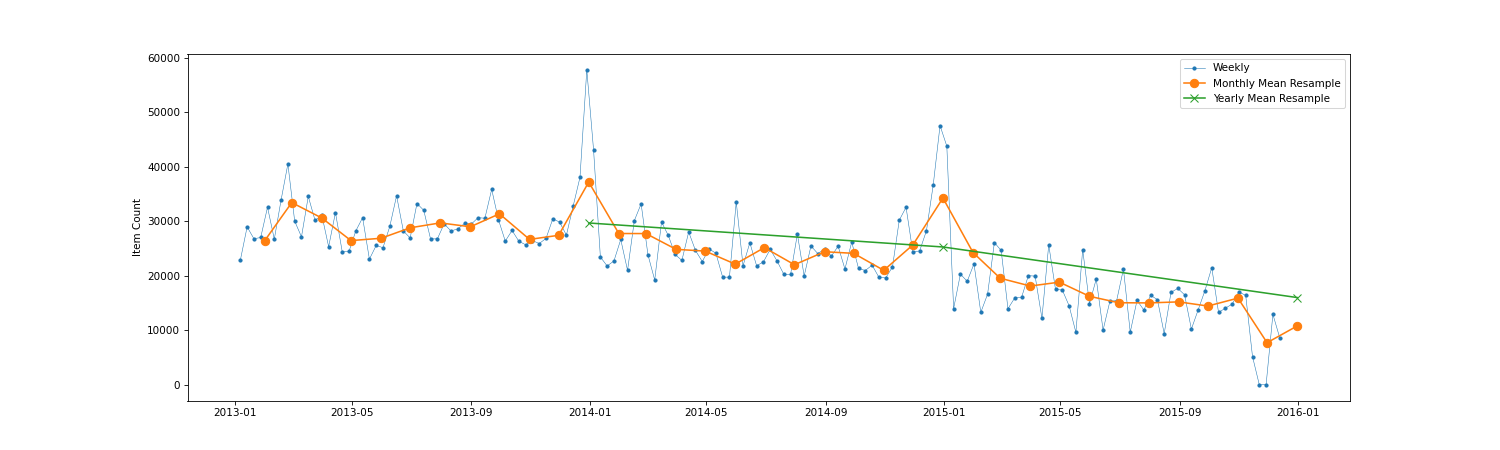

In [173]:
y = df['item_cnt_day']
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(y,marker='.', linestyle='-', linewidth=0.5, label='Weekly')
ax.plot(y.resample('M').mean(),marker='o', markersize=8, linestyle='-', label='Monthly Mean Resample')
ax.plot(y.resample('Y').mean(),marker='x', markersize=8, linestyle='-', label='Yearly Mean Resample')
ax.set_ylabel('Item Count')
ax.legend();

In [174]:
import statsmodels.api as sm

# graphs to show seasonal_decompose
def seasonal_decompose (y):
    decomposition = sm.tsa.seasonal_decompose(y, model='additive',extrapolate_trend='freq')
    fig = decomposition.plot()
    fig.set_size_inches(14,7)
    plt.show()

<IPython.core.display.Javascript object>


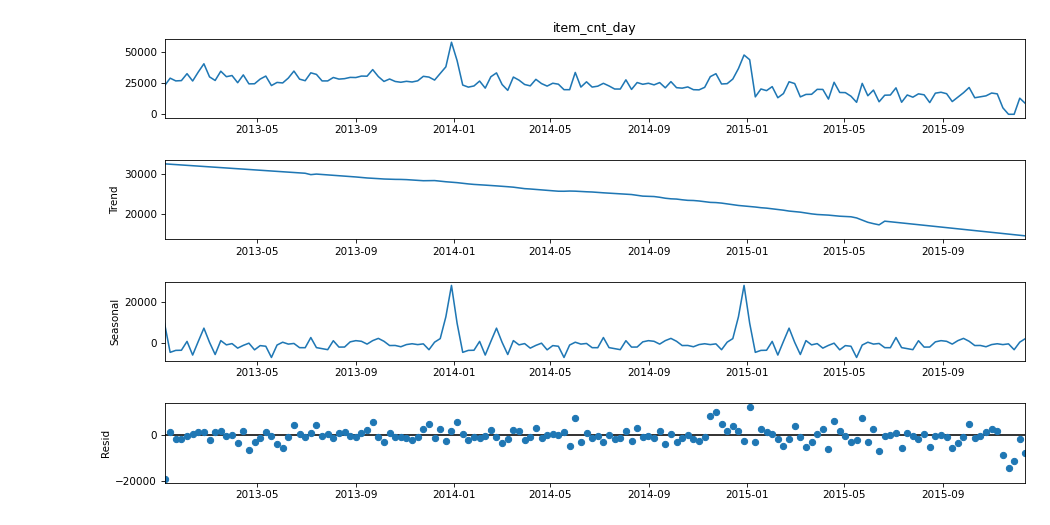

In [175]:
seasonal_decompose(y)

From observation from the four component, we can see the sales trend decreased from 2013 to 2015. 
The seasonal peak is 2014 & 2015 January


# Check Stationarity of a Time Series

In [163]:
### plot for Rolling Statistic for testing Stationarity
def test_stationarity(timeseries, title):
    
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean() 
    rolstd = pd.Series(timeseries).rolling(window=12).std()
    
    fig, ax = plt.subplots(figsize=(16, 4))
    ax.plot(timeseries, label= title)
    ax.plot(rolmean, label='rolling mean');
    ax.plot(rolstd, label='rolling std (x10)');
    ax.legend()

<IPython.core.display.Javascript object>


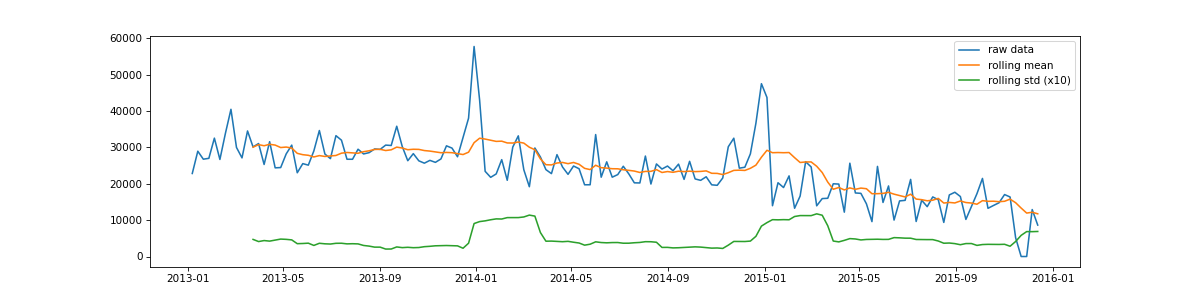

In [164]:
pd.options.display.float_format = '{:.8f}'.format
test_stationarity(y,'raw data')

The ADF approach is essentially a statistical significance test that compares the p-value with the critical values and does hypothesis testing. Using this test, we can determine whether the processed data is stationary or not with different levels of confidence.

In [165]:
from statsmodels.tsa.stattools import adfuller

def ADF_test(timeseries, dataDesc):
    print(' > Is the {} stationary ?'.format(dataDesc))
    dftest = adfuller(timeseries.dropna(), autolag='AIC')
    print('Test statistic = {:.3f}'.format(dftest[0]))
    print('P-value = {:.3f}'.format(dftest[1]))
    print('Critical values :')
    for k, v in dftest[4].items():
        print('\t{}: {} - The data is {} stationary with {}% confidence'.format(k, v, 'not' if v<dftest[0] else '', 100-int(k[:-1])))

In [166]:
ADF_test(y,'raw data')

 > Is the raw data stationary ?
Test statistic = -0.150
P-value = 0.944
Critical values :
	1%: -3.4776006742422374 - The data is not stationary with 99% confidence
	5%: -2.882265832283648 - The data is not stationary with 95% confidence
	10%: -2.5778219289774156 - The data is not stationary with 90% confidence


Conclusion: Looking at both the visualization and ADF test, we can tell that our sample sales data is non-stationary. 

# Make Data Stationary

To proceed with our time series analysis, we need to stationarize the dataset. There are many approaches to stationarize data, but we’ll use de-trending, differencing, and then a combination of the two.

<IPython.core.display.Javascript object>


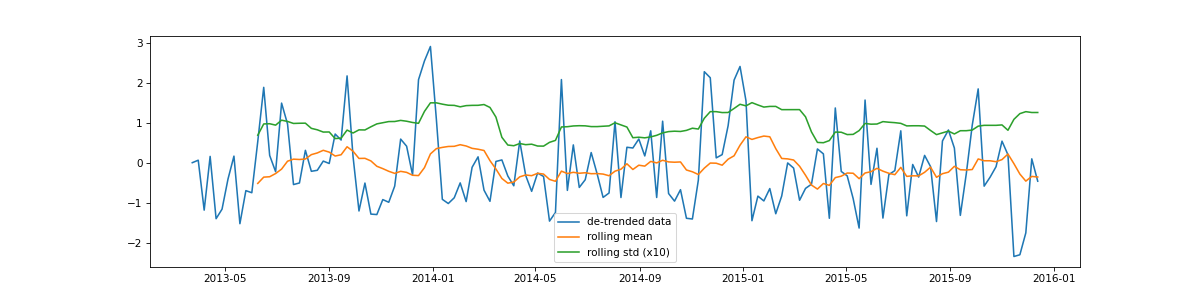

 > Is the de-trended data stationary ?
Test statistic = -5.878
P-value = 0.000
Critical values :
	1%: -3.4793722137854926 - The data is  stationary with 99% confidence
	5%: -2.8830370378332995 - The data is  stationary with 95% confidence
	10%: -2.578233635380623 - The data is  stationary with 90% confidence


In [167]:
y_detrend =  (y - y.rolling(window=12).mean())/y.rolling(window=12).std()

test_stationarity(y_detrend,'de-trended data')
ADF_test(y_detrend,'de-trended data')

The results show that the data is now stationary, indicated by the relative smoothness of the rolling mean and rolling standard deviation after running the ADF test again.

<IPython.core.display.Javascript object>


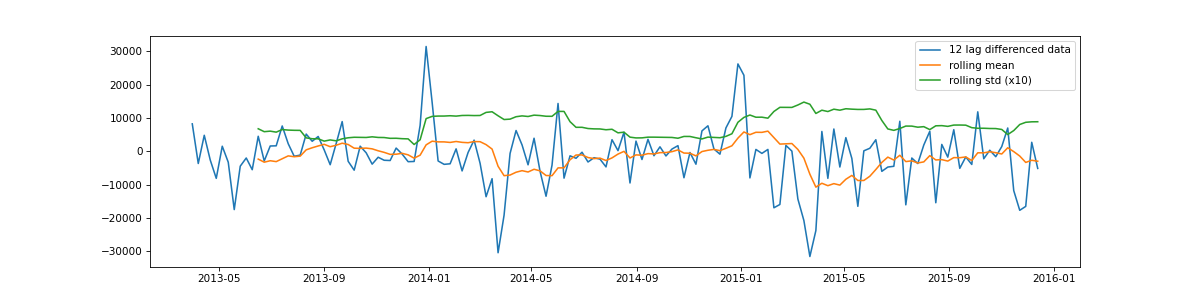

 > Is the 12 lag differenced data stationary ?
Test statistic = -3.364
P-value = 0.012
Critical values :
	1%: -3.482087964046026 - The data is not stationary with 99% confidence
	5%: -2.8842185101614626 - The data is  stationary with 95% confidence
	10%: -2.578864381347275 - The data is  stationary with 90% confidence


In [168]:
# Differencing
y_12lag =  y - y.shift(12)

test_stationarity(y_12lag,'12 lag differenced data')
ADF_test(y_12lag,'12 lag differenced data')

This method did not perform as well as the de-trending did, as indicated by the ADF test which is not stationary within 99 percent of the confidence interval.

<IPython.core.display.Javascript object>


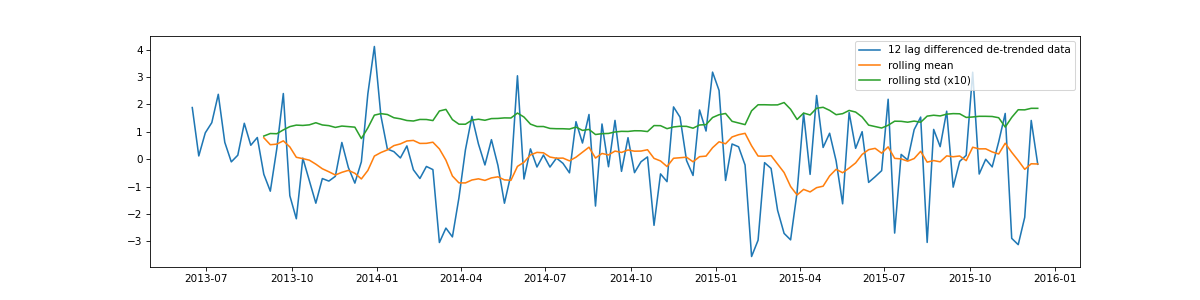

 > Is the 12 lag differenced de-trended data stationary ?
Test statistic = -4.072
P-value = 0.001
Critical values :
	1%: -3.4870216863700767 - The data is  stationary with 99% confidence
	5%: -2.8863625166643136 - The data is  stationary with 95% confidence
	10%: -2.580009026141913 - The data is  stationary with 90% confidence


In [169]:
# Detrending + Differencing

y_12lag_detrend =  y_detrend - y_detrend.shift(12)

test_stationarity(y_12lag_detrend,'12 lag differenced de-trended data')
ADF_test(y_12lag_detrend,'12 lag differenced de-trended data')

Using the combination of the two methods, we see from both the visualization and the ADF test that the data is now stationary. This is the transformation we will use moving forward with our analysis.

# Train Test Split

In [57]:
gp_train.head()

,shop_id,date,item_cnt_day
,,,sum
0,0,2013-01-02,228.0
1,0,2013-01-13,144.0
2,0,2013-01-14,138.0
3,0,2013-01-15,153.0
4,0,2013-01-16,154.0


In [62]:
sub_train_df = gp_train.loc[gp_train["shop_id"]==0]

In [64]:
sub_train_df.shape

(57, 3)

In [171]:
y_to_train = y[:'2014-06-29'] # dataset to train
y_to_val = y['2014-07-02':] # last X months for test  
predict_date = len(y) - len(y[:'2014-07-02']) # the number of data points for the test set

# Different Time Series Prediction Models

Simple Exponential Smoothing (SES) for data without trend or seasonality

Holt’s Linear Trend Method for data with a trend but no seasonality


Holt-Winters’ Seasonal Method for data with trend and/or seasonality


SARIMA for data with trend and/or seasonality